## README

### 実行
実行時には`run_sh`ディレクトリ内の`run_nishio.sh`を実行する．  

`run_sh`ディレクトリ内の`run_nishio.sh`を実行することで，まとめて複数のデータセットを実行できる．

このとき，run_nishio.sh内の`--root_path`を変更して実験結果の格納場所を指定する．

- pytorch_modelsディレクトリで以下を実行

```python
!bash ./run_sh/run_nishio.sh
```

ログはsaved_modelの.logに格納される．

### 実行2
モデルやデータセットを直接指定してモデルを学習させることも可能
```python
!python main.py --root_path /content/drive/MyDrive/Bayes_research/experiments/pytorch_models/saved_model/eight_layer1219/ \
--model_type convmem01 --epochs 200 --dataset Eddi \
--batch_size=512 --fold 1 --lr 0.001
```

## 各モデルの切り替え

提案モデル`convmem01`を指定
堤モデル，及びカクモデル
同じ`sutsmi`を指定するが，各モデルの場合はDeeptsutsumiクラスのコメントアウトを切り替える．
```python
# memory_value = mem.write(qa, memory_value, correlation_weight)
memory_value = mem.hyper_write(qa, memory_value, correlation_weight)
```

# 層の切り替え
forward文のコメントアウトで切り替え
```python
conv_ht = self.conv1(conv_ht)[:, :, :-self.padding1].contiguous()
conv_ht = self.conv2(conv_ht)[:, :, :-self.padding2].contiguous()
conv_ht = self.conv3(conv_ht)[:, :, :-self.padding3].contiguous()
conv_ht = self.conv4(conv_ht)[:, :, :-self.padding4].contiguous()
conv_ht = self.conv5(conv_ht)[:, :, :-self.padding5].contiguous()
conv_ht = self.conv6(conv_ht)[:, :, :-self.padding6].contiguous()
conv_ht = self.conv7(conv_ht)[:, :, :-self.padding7].contiguous()
conv_ht = self.conv8(conv_ht)[:, :, :-self.padding8].contiguous()
```

In [ ]:
cd /content/drive/MyDrive/Bayes_research/experiments/pytorch_models/

In [ ]:
!bash ./run_sh/run_nishio.sh

In [ ]:
!bash ./run_sh/run_eddi_tsutsumi.sh

### simulation

In [ ]:
!bash ./run_sh/sim_train.sh

In [ ]:
!bash ./run_sh/sim_train_tsutsumi.sh

In [ ]:
!bash ./run_sh/sim_train_tsutsumi_normal.sh

# 相関係数

真の能力値と予測能力値を用いた結果から相関係数を算出する．

In [ ]:
print(res_dic_normal["auc"])

0.985870772724764


In [ ]:
cd /content/drive/MyDrive/Bayes_research/experiments/pytorch_models/

/content/drive/MyDrive/Bayes_research/experiments/pytorch_models


In [ ]:
import numpy as np
import pandas as pd


item_num = [50, 100, 200, 300]
sigma = ["0.1", "0.3", "0.5", "1.0"]
s_models = ["nishio_conv2"]
# s_models = ["tsutsumi",
#             "tsutsumi_hyper",
#             "nishio_conv1",
#             "nishio_conv2",
#             "nishio_conv3",
#             "nishio_conv4",
#             "nishio_conv5",
#             "nishio_conv6",
#             "nishio_conv7"]

res_list = np.zeros((len(sigma)*len(s_models), len(item_num)*3))
res_auc_acc_list = np.zeros((len(sigma)*len(s_models), len(item_num)*2))

for i, item in enumerate(item_num):
    for j, sig in enumerate(sigma):
        print("="*15+f"{item}-{sig}"+"="*15)
        for k, m in enumerate(s_models):
            print("="*2+m+"="*2)
            ans_path = f"./data/simu_item{item}_learner2000_sigma{sig}/valid_theta.csv"
            base_path = f"./saved_model/sim_exp02/{m}/"
            theta_path = base_path+f"simu_item{item}_learner2000_sigma{sig}1_si0/simu_item{item}_learner2000_sigma{sig}1_si0.npy"
            sample_theta = pd.read_csv(ans_path, header=None)
            sample_res_normal = np.load(theta_path, allow_pickle=True)
            res_dic_normal = sample_res_normal.item()
            pred_theta = np.squeeze(res_dic_normal["theta"][0:item, :, :], axis=2).T

            theta_df = pd.DataFrame({
                "true_theta":sample_theta.values.flatten(),
                "pred_theta":pred_theta.flatten()
            })
            auc, acc = res_dic_normal["auc"], res_dic_normal["acc"]
            res_auc_acc_list[len(s_models)*j+k][i] = auc
            res_auc_acc_list[len(s_models)*j+k][len(sigma)+i] = acc
            for l, c in enumerate(["pearson", "spearman", "kendall"]):
                res_theta = theta_df.corr(c).values
                print(f"item:{item} sigma:{sig} {c}:{res_theta[0][1]:.3f} auc:{auc:.3f}")
                # print(3*j+k,4*l+i)
                res_list[len(s_models)*j+k][len(sigma)*l+i] = res_theta[0][1]

===============50-0.1===============
==nishio_conv2==
item:50 sigma:0.1 pearson:0.772 auc:0.915
item:50 sigma:0.1 spearman:0.775 auc:0.915
item:50 sigma:0.1 kendall:0.580 auc:0.915
===============50-0.3===============
==nishio_conv2==
item:50 sigma:0.3 pearson:0.828 auc:0.920
item:50 sigma:0.3 spearman:0.842 auc:0.920
item:50 sigma:0.3 kendall:0.652 auc:0.920
===============50-0.5===============
==nishio_conv2==
item:50 sigma:0.5 pearson:0.866 auc:0.931
item:50 sigma:0.5 spearman:0.890 auc:0.931
item:50 sigma:0.5 kendall:0.707 auc:0.931
===============50-1.0===============
==nishio_conv2==
item:50 sigma:1.0 pearson:0.837 auc:0.942
item:50 sigma:1.0 spearman:0.884 auc:0.942
item:50 sigma:1.0 kendall:0.696 auc:0.942
===============100-0.1===============
==nishio_conv2==
item:100 sigma:0.1 pearson:0.848 auc:0.917
item:100 sigma:0.1 spearman:0.840 auc:0.917
item:100 sigma:0.1 kendall:0.662 auc:0.917
===============100-0.3===============
==nishio_conv2==
item:100 sigma:0.3 pearson:0.885 auc

In [ ]:
res_list

array([[0.77198639, 0.84765256, 0.92074351, 0.93119952, 0.77525608,
        0.84005898, 0.92933419, 0.9357856 , 0.58049765, 0.66154337,
        0.76938366, 0.78573516],
       [0.82844966, 0.88467031, 0.89748303, 0.90385882, 0.84218891,
        0.91337907, 0.94559879, 0.95243765, 0.6515182 , 0.7416369 ,
        0.79094803, 0.80270431],
       [0.86636169, 0.86821389, 0.85647127, 0.84566582, 0.89000557,
        0.92661926, 0.93704371, 0.9334877 , 0.70713136, 0.75621015,
        0.77664286, 0.76877147],
       [0.83651397, 0.83256068, 0.85046431, 0.82700176, 0.88388022,
        0.92209503, 0.9325423 , 0.93224236, 0.69557477, 0.74900943,
        0.76514241, 0.76785605]])

In [ ]:
np.savetxt('res_theta_1.csv', res_list, fmt='%.3f', delimiter=",")

In [ ]:
np.savetxt('res_auc_acc_1.csv', res_auc_acc_list, fmt='%.3f', delimiter=",")

In [ ]:
import pandas as pd
item_num = 50
pred_theta = np.squeeze(res_dic_normal["theta"][0:item_num, :, :], axis=2).T

theta_df = pd.DataFrame({
    "true_theta":sample_theta.values.flatten(),
    "pred_theta":pred_theta.flatten()
})
theta_df

,true_theta,pred_theta
0,0.010,0.896553
1,-0.032,0.795315
2,0.082,1.041367
3,0.099,0.521589
4,0.394,-0.349530
...,...,...
9995,-1.875,-2.423201
9996,-1.743,-2.446579
9997,-1.678,-2.330055
9998,-1.781,-2.355798


In [ ]:
res_theta = theta_df.corr().values
print(f"theta:{res_theta[0][1]}")

theta:0.6729036353497252


## 単一スキル変化の実験

別のディレクトリ`pytorch_models_for_ability_display`のコードを動かす．
以下のコマンドで学習及び予測を行う．

学習の際はearly stoppingなどを使用せず，直接エポックを指定する．

logは`.npy`に圧縮されて保存される．

In [ ]:
cd /content/drive/MyDrive/Bayes_research/experiments/pytorch_models2/

/content/drive/MyDrive/Bayes_research/experiments/pytorch_models2


In [ ]:
  !python main.py \
  --root_path /content/drive/MyDrive/Bayes_research/experiments/pytorch_models2/saved_model/eight_layer_ability/kaku/ \
  --model_type tsutsumi --epochs 40 --dataset assist2009_pid \
  --batch_size=512 --fold 0 --lr 0.01 --skill_item 1

In [ ]:
!python main.py --root_path /content/drive/MyDrive/Bayes_research/experiments/pytorch_models2/saved_model/eight_layer_ability/nishio/ \
--model_type convmem01 --epochs 40 --dataset assist2009_pid \
--batch_size=1024 --fold 0 --lr 0.01 --skill_item 1

提案モデルの図


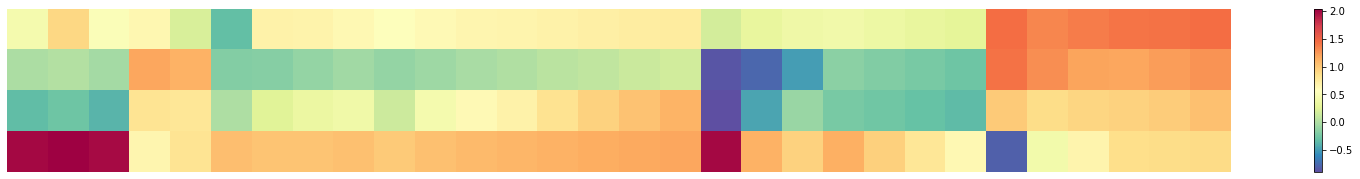

In [ ]:
import numpy as np
# theta_path = base_path+f"simu_item{item}_learner2000_sigma{sig}1_si0/simu_item{item}_learner2000_sigma{sig}1_si0.npy"
theta_path = "/content/drive/MyDrive/Bayes_research/experiments/pytorch_models2/saved_model/eight_layer_ability/nishio/assist2009_pid0_si1/assist2009_pid0_si1.npy"
sample_res_normal = np.load(theta_path, allow_pickle=True)
res_dic_normal = sample_res_normal.item()
import numpy as np
import matplotlib.pyplot as plt

# 20x5のダミーデータ作成
# mat = np.zeros((4,20))
# mat[0:1, :]=4
# mat = (res_dic_normal["theta"].T)[0][1:5,100:130]
mat = (res_dic_normal["theta"].T)[0][1:5,100:130]

# グラフ表示
plt.figure(figsize=(30,3))
# plt.imshow(mat,interpolation='nearest',cmap='coolwarm')
plt.imshow(mat,interpolation='none',cmap='Spectral_r')
plt.axis("off")
plt.colorbar()
plt.show()

既存モデルの図

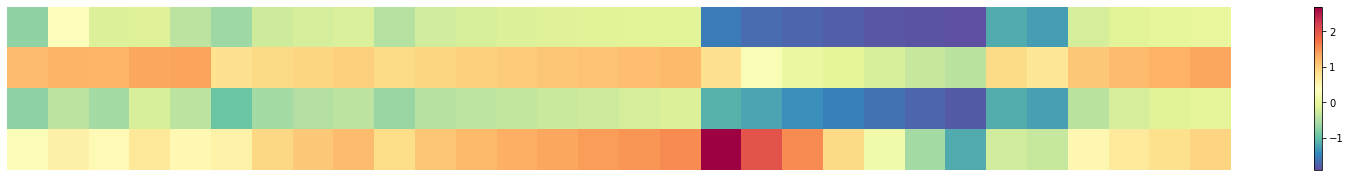

In [ ]:
import numpy as np
# theta_path = base_path+f"simu_item{item}_learner2000_sigma{sig}1_si0/simu_item{item}_learner2000_sigma{sig}1_si0.npy"
theta_path = "/content/drive/MyDrive/Bayes_research/experiments/pytorch_models2/saved_model/eight_layer_ability/kaku/assist2009_pid0_si1/assist2009_pid0_si1.npy"
sample_res_normal = np.load(theta_path, allow_pickle=True)
res_dic_normal = sample_res_normal.item()
import numpy as np
import matplotlib.pyplot as plt

# 20x5のダミーデータ作成
# mat = np.zeros((4,20))
# mat[0:1, :]=4
mat = (res_dic_normal["theta"].T)[0][1:5,100:130]

# グラフ表示
plt.figure(figsize=(30,3))
# plt.imshow(mat,interpolation='nearest',cmap='coolwarm')
plt.imshow(mat,interpolation='none',cmap='Spectral_r')
plt.axis("off")
plt.colorbar()
plt.show()

## Skill変化の差分

スキルを一つだけ取ってきたとき

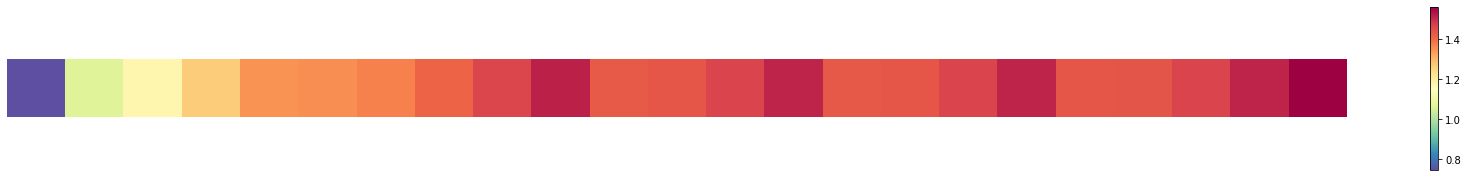

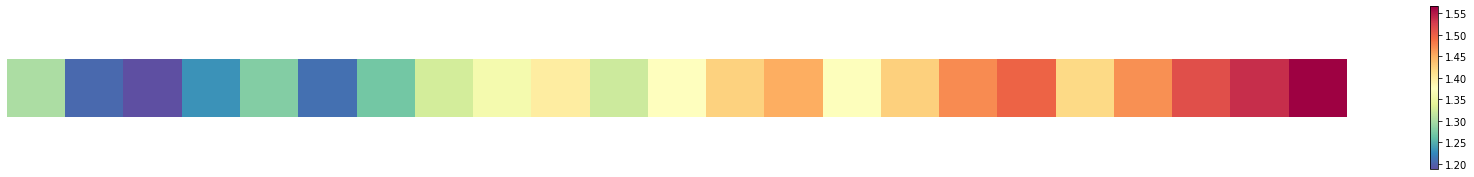

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
start, end = 125, 148
# theta_path = base_path+f"simu_item{item}_learner2000_sigma{sig}1_si0/simu_item{item}_learner2000_sigma{sig}1_si0.npy"
theta_path = "/content/drive/MyDrive/Bayes_research/experiments/pytorch_models2/saved_model/eight_layer_ability/kaku/assist2009_pid0_si1/assist2009_pid0_si1.npy"
sample_res_normal = np.load(theta_path, allow_pickle=True)
res_dic_normal = sample_res_normal.item()
mat = (res_dic_normal["theta"].T)[0][2:3,start:end]

# グラフ表示
plt.figure(figsize=(30,3))
# plt.imshow(mat,interpolation='nearest',cmap='coolwarm')
plt.imshow(mat,interpolation='none',cmap='Spectral_r')
plt.axis("off")
plt.colorbar()
plt.show()


# theta_path = base_path+f"simu_item{item}_learner2000_sigma{sig}1_si0/simu_item{item}_learner2000_sigma{sig}1_si0.npy"
theta_kaku_path = "/content/drive/MyDrive/Bayes_research/experiments/pytorch_models2/saved_model/eight_layer_ability/nishio/assist2009_pid0_si1/assist2009_pid0_si1.npy"
sample_res_normal = np.load(theta_kaku_path, allow_pickle=True)
res_dic_normal = sample_res_normal.item()
mat = (res_dic_normal["theta"].T)[0][2:3,start:end]

# グラフ表示
plt.figure(figsize=(30,3))
# plt.imshow(mat,interpolation='nearest',cmap='coolwarm')
plt.imshow(mat,interpolation='none',cmap='Spectral_r')
plt.axis("off")
plt.colorbar()
plt.show()

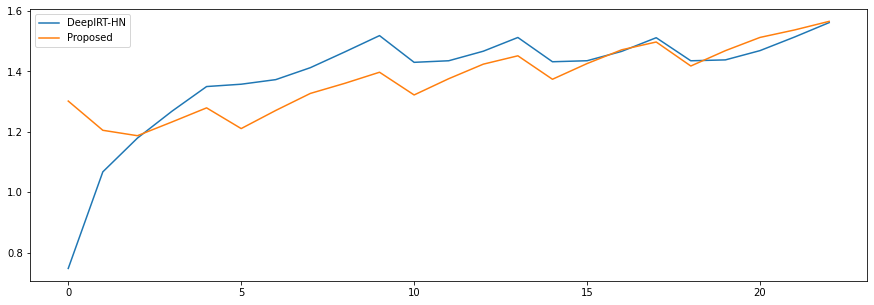

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
start, end = 125, 148

theta_path = "/content/drive/MyDrive/Bayes_research/experiments/pytorch_models2/saved_model/eight_layer_ability/nishio/assist2009_pid0_si1/assist2009_pid0_si1.npy"
sample_res_normal = np.load(theta_path, allow_pickle=True)
res_dic_normal = sample_res_normal.item()
mat = (res_dic_normal["theta"].T)[0][2:3,start:end]

theta_kaku_path = "/content/drive/MyDrive/Bayes_research/experiments/pytorch_models2/saved_model/eight_layer_ability/kaku/assist2009_pid0_si1/assist2009_pid0_si1.npy"
kaku_res_normal = np.load(theta_kaku_path, allow_pickle=True)
kaku_res_dic_normal = kaku_res_normal.item()
kaku_mat = (kaku_res_dic_normal["theta"].T)[0][2:3,start:end]

plt.figure(figsize=(15,5))
plt.plot(kaku_mat.flatten(),label="DeepIRT-HN")
plt.plot(mat.flatten(), label="Proposed")
plt.legend()

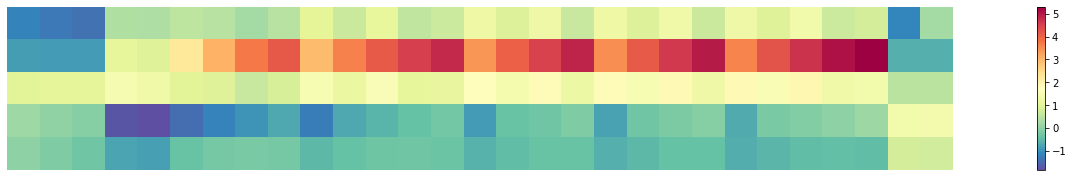

(5, 29)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 20x5のダミーデータ作成
# mat = np.zeros((4,20))
# mat[0:1, :]=4
mat = (res_dic_normal["theta"].T)[0][0:5,121:150]

# グラフ表示
plt.figure(figsize=(30,3))
# plt.imshow(mat,interpolation='nearest',cmap='coolwarm')
plt.imshow(mat,interpolation='nearest',cmap='Spectral_r')
plt.axis("off")
plt.colorbar()
plt.show()
print(mat.shape)

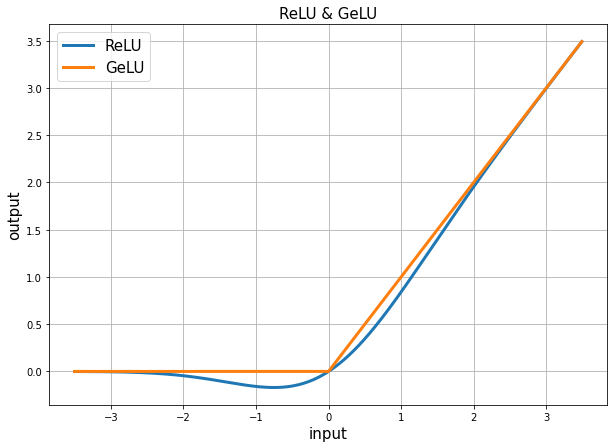

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def gel_func(x):
    y = 0.5*x*(1+np.tanh(np.sqrt(2/np.pi)*(x+0.044715*np.power(x, 3))))
    return y
def relu_func(x):
    return x * (x > 0)
x = np.arange(-3.5, 3.5, 0.01)

plt.figure(figsize=(10, 7))
plt.plot(x, gel_func(x), label="ReLU", linewidth=3)
plt.plot(x, relu_func(x), label="GeLU", linewidth=3)
plt.grid()
plt.title("ReLU & GeLU",fontsize=15)
plt.xlabel("input",fontsize=15)
plt.ylabel("output",fontsize=15)
plt.legend(fontsize=15)